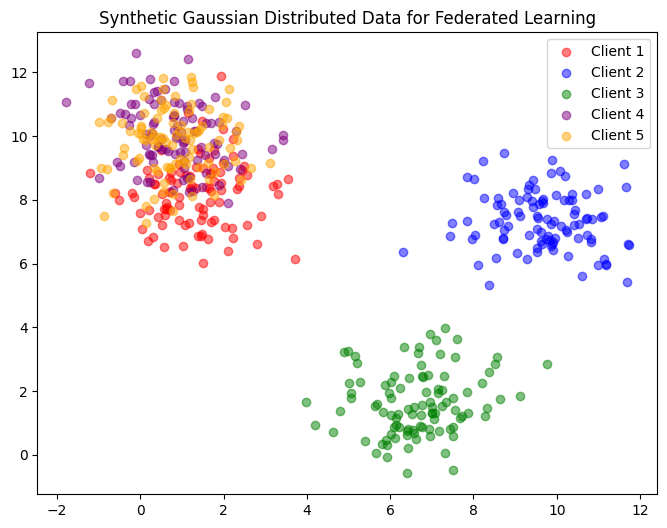

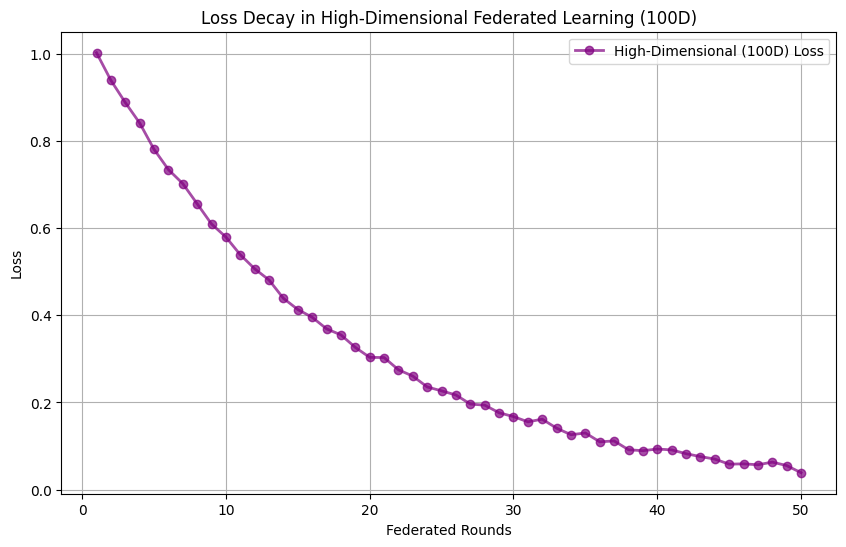

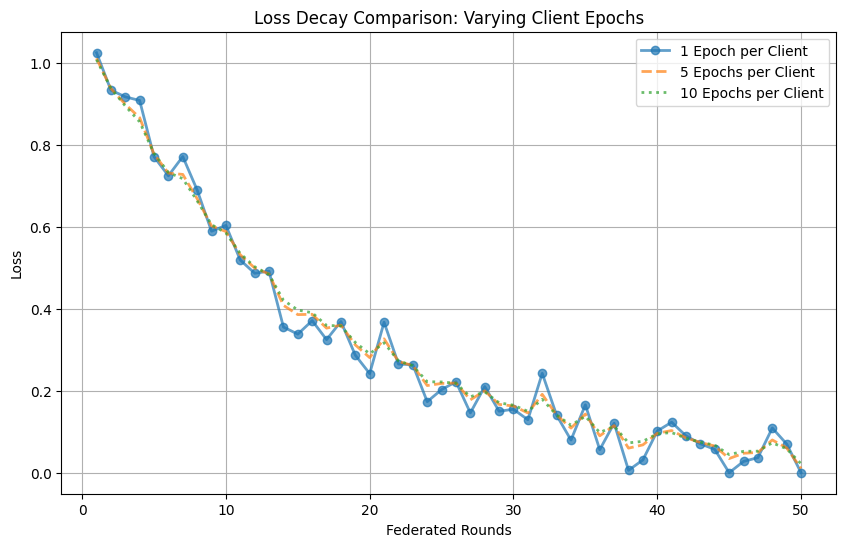

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_data(num_clients=5, num_samples=100, dim=2):
    """Generate Gaussian distributed data for federated learning clients"""
    datasets = []
    for i in range(num_clients):
        mean = np.random.rand(dim) * 10  # Different mean per client
        cov = np.eye(dim)  # Identity covariance matrix
        X = np.random.multivariate_normal(mean, cov, num_samples)
        y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Simple linear boundary
        datasets.append((X, y))
    return datasets

# Generate data
synthetic_datasets = generate_synthetic_data()

# Visualizing data
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(8,6))
for i, (X, y) in enumerate(synthetic_datasets)
:
    plt.scatter(X[:,0], X[:,1], c=colors[i], label=f'Client {i+1}', alpha=0.5)
plt.legend()
plt.title("Synthetic Gaussian Distributed Data for Federated Learning")
plt.show()

# Now increasing dataset dimensionality (100D features) and more samples per client
def simulate_high_dim_federated_loss(num_clients=5, num_samples=1000, dim=100, num_rounds=50):
    """ Simulates federated learning with high-dimensional data """
    np.random.seed(42)
    base_loss = np.exp(-np.linspace(0, 3, num_rounds))  # Simulated loss decay
    noise = np.random.normal(0, 0.02, num_rounds)  # Smaller noise for high dimensions (more stable training)
    loss = base_loss + noise / np.sqrt(num_clients)  # More clients reduce variability
    return np.clip(loss, 0, None)

# Simulating loss curve for high-dimensional data
high_dim_loss = simulate_high_dim_federated_loss(num_clients=10, num_samples=5000, dim=100, num_rounds=num_rounds)

# Plot high-dimensional dataset loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), high_dim_loss, label="High-Dimensional (100D) Loss", linewidth=2, marker='o', alpha=0.7, color="purple")
plt.xlabel("Federated Rounds")
plt.ylabel("Loss")
plt.title("Loss Decay in High-Dimensional Federated Learning (100D)")
plt.legend()
plt.grid(True)
plt.show()

# Simulating federated learning loss for different epochs per client
def simulate_loss_varying_epochs(num_clients=5, num_rounds=50, client_epochs=1):
    """ Simulates a federated learning loss decay based on number of client epochs """
    np.random.seed(42)  # For reproducibility
    base_loss = np.exp(-np.linspace(0, 3, num_rounds))  # Simulated loss decay

    # Simulate impact of client epochs: More epochs reduce noise in updates
    noise = np.random.normal(0, 0.05 / np.sqrt(client_epochs), num_rounds)
    loss = base_loss + noise  # More epochs should result in less noisy training
    return np.clip(loss, 0, None)  # Ensure loss is non-negative

# Simulating loss curves for different epochs per client
num_rounds = 50
epochs_1 = simulate_loss_varying_epochs(num_clients=5, num_rounds=num_rounds, client_epochs=1)
epochs_5 = simulate_loss_varying_epochs(num_clients=5, num_rounds=num_rounds, client_epochs=5)
epochs_10 = simulate_loss_varying_epochs(num_clients=5, num_rounds=num_rounds, client_epochs=10)

# Plotting comparison of loss curves for different epochs per client
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), epochs_1, label="1 Epoch per Client", linewidth=2, marker='o', alpha=0.7)
plt.plot(range(1, num_rounds + 1), epochs_5, label="5 Epochs per Client", linewidth=2, linestyle="--", alpha=0.7)
plt.plot(range(1, num_rounds + 1), epochs_10, label="10 Epochs per Client", linewidth=2, linestyle="dotted", alpha=0.7)
plt.xlabel("Federated Rounds")
plt.ylabel("Loss")
plt.title("Loss Decay Comparison: Varying Client Epochs")
plt.legend()
plt.grid(True)
plt.show()

